<a href="https://colab.research.google.com/github/NoelleI/Udacity-Deployment/blob/master/Heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:


'''Step 1 Detect Skin 
this code was adapted from https://www.pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
and
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/'''

# import the necessary packages
import imutils
import numpy as np
import argparse
import cv2
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
# construct the argument parse and parse the arguments

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
# if a video path was not supplied, grab the reference
# to the gray


camera = cv2.VideoCapture("skin_detect.MOV")  
n_frames = int(camera.get(cv2.CAP_PROP_FRAME_COUNT))
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(n_frames)

''''change this'''


ra = []
ga = []
ba = []
box = []

# keep looping over the frames in the video
for i in range(n_frames):
    
    print(i)
	# grab the current frame
    (grabbed, frame) = camera.read()
	# if we are viewing a video and we did not grab a
	# frame, then we have reached the end of the video
	# resize the frame, convert it to the HSV color space,
	# and determine the HSV pixel intensities that fall into
	# the speicifed upper and lower boundaries
    if grabbed:
        frame = imutils.resize(frame, width = 400)
        frame = imutils.rotate(frame, -90)
        converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        skinMask = cv2.inRange(converted, lower, upper)
	# apply a series of erosions and dilations to the mask
	# using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        skinMask = cv2.erode(skinMask, kernel, iterations = 2)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
	# blur the mask to help remove noise, then apply the
	# mask
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        skin = cv2.bitwise_and(frame, frame, mask = skinMask)

        bboxes = classifier.detectMultiScale(skin, 1.05, 8)
        print('len bboxes:', len(bboxes))
        if box == []:  
          if len(bboxes) ==0:
            print("face not detected in first frame")
            cv2_imshow(np.vstack([frame, skin]))  ##change to an assert later
          else:
            box = bboxes[0]
#choose the box most like the last frame, if more than one box. If zero boxes, use box from last frame
        else:
          if len(bboxes) ==0:
            box = box   
            print("old box used") 
          else:
           test2 = np.zeros(len(bboxes))
           for i, boxnew in enumerate(bboxes):
            [xn, yn, widthn, heightn] = boxnew 
            x2n = xn + widthn
            y2n = yn + heightn
           	# draw a rectangle mask and compare to box from previous frame
            tempn = np.zeros([frame.shape[0], frame.shape[1]])
            tempn = tempn.astype(np.uint8)
            cv2.rectangle(tempn, (xn, yn), (x2n, y2n), (255,255,255), -1)
            test = cv2.bitwise_and(temp, temp, mask = tempn)
            test2[i] = np.mean(test)
           boxt = bboxes[np.argmax(test2)]
           if boxt[3] <= width*0.9 or boxt[3] >= width*1.1:
             box = box
             print("old box used")
           else:
             box = boxt
             print("nearest box used")
	# extract
        [x, y, width, height] = box 
        x2 = x + width
        y2 = y + height
        x2 = int(x2 - 0.2*width)
        x = int(x + 0.2*width)
        #y2 = int(y2 - 0.8*height)
           	# draw a rectangle over the pixels
        temp = np.zeros([frame.shape[0], frame.shape[1]])
        cv2.rectangle(temp, (x, y), (x2, y2), (255,255,255), -1)
        temp = temp/255
        temp = temp.astype(np.uint8)
        skin = cv2.bitwise_and(skin, skin, mask = temp)



        #find the average red, green and blue in the skin
        N = 0
        r=0
        g=0
        b=0
        skinr = skin[:,:,0].reshape(-1)
        sking = skin[:,:,1].reshape(-1)
        skinb = skin[:,:,2].reshape(-1)

        #print(skinMask.shape)
        for i, pixel in enumerate(skinMask.reshape(-1)):
          if  not pixel==0:
            r += skinr[i]
            g += sking[i]
            b += skinb[i]
            N+=1
        ra += [r/N] 
        ga += [g/N]
        ba += [b/N]




	# show the skin in the image along with the mask
      
        #cv2_imshow(np.vstack([frame, skin]))
# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

1833
0
len bboxes: 1
1
len bboxes: 1
nearest box used


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Streaming output truncated to the last 5000 lines.
len bboxes: 1
nearest box used
166
len bboxes: 1
nearest box used
167
len bboxes: 1
nearest box used
168
len bboxes: 1
nearest box used
169
len bboxes: 1
nearest box used
170
len bboxes: 1
nearest box used
171
len bboxes: 1
nearest box used
172
len bboxes: 1
nearest box used
173
len bboxes: 1
nearest box used
174
len bboxes: 1
nearest box used
175
len bboxes: 1
nearest box used
176
len bboxes: 1
nearest box used
177
len bboxes: 1
nearest box used
178
len bboxes: 1
nearest box used
179
len bboxes: 1
nearest box used
180
len bboxes: 1
nearest box used
181
len bboxes: 1
nearest box used
182
len bboxes: 1
nearest box used
183
len bboxes: 1
nearest box used
184
len bboxes: 1
nearest box used
185
len bboxes: 1
nearest box used
186
len bboxes: 1
nearest box used
187
len bboxes: 1
nearest box used
188
len bboxes: 1
nearest box used
189
len bboxes: 1
nearest box used
190
len bboxes: 1
nearest box used
191
len bboxes: 1
nearest box used
192
len 

In [222]:
ra = np.array(ra)

In [223]:
np.argmin(ra)

1381

In [224]:
ra[np.argmin(ra)]

70.95114006514657

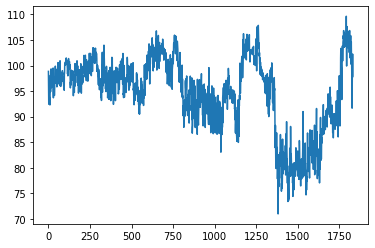

In [225]:
import matplotlib.pyplot as plt

plt.plot(ra)

In [226]:
ga = np.array(ga)
ba = np.array(ba)

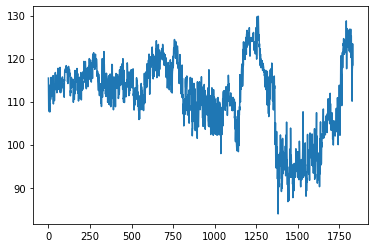

In [227]:
plt.plot(ga)

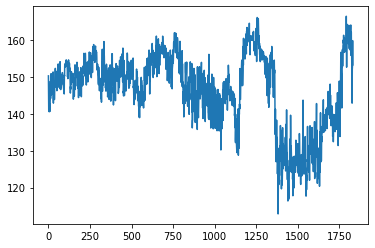

In [228]:
plt.plot(ba)

In [229]:
from sklearn.decomposition import FastICA
from scipy import signal
transformer = FastICA(n_components=3)

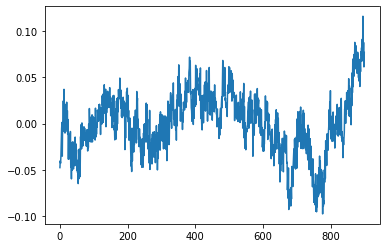

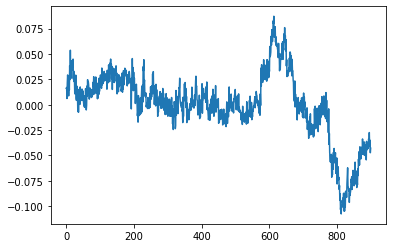

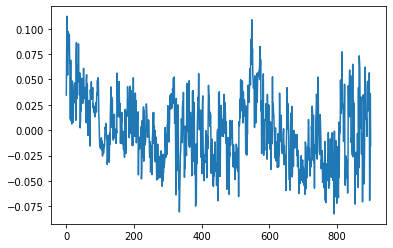

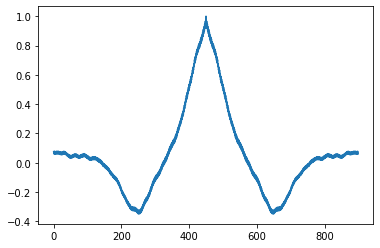

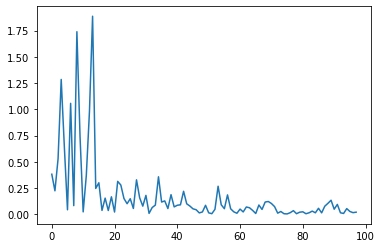

1.8869666751370477 1.739494891192367
waiting


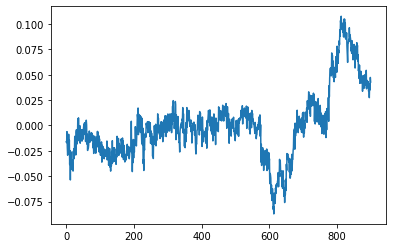

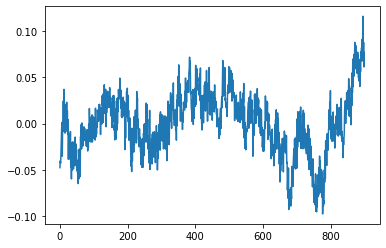

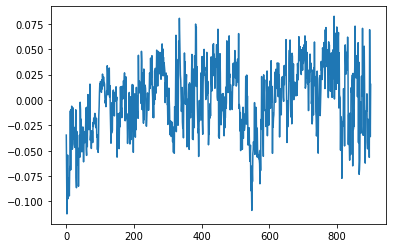

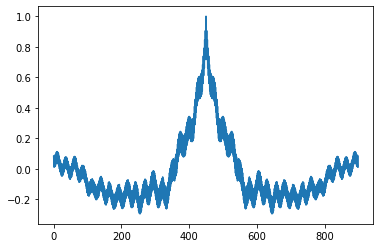

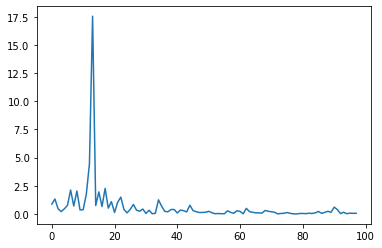

17.553719732787197 2.263354125963214
estimated heartrate  70.0


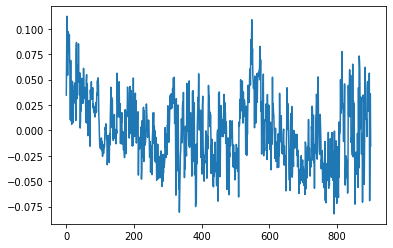

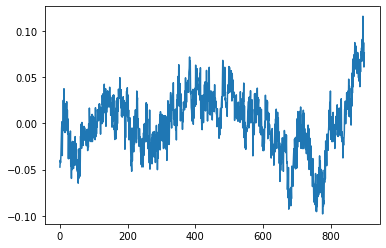

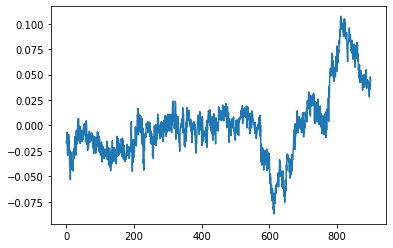

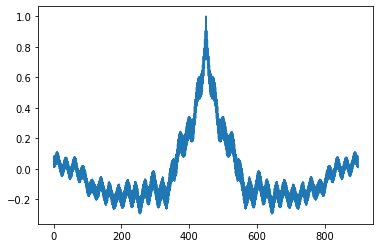

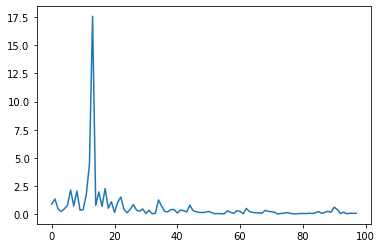

17.59387950437825 2.2623196247257082
estimated heartrate  70.0


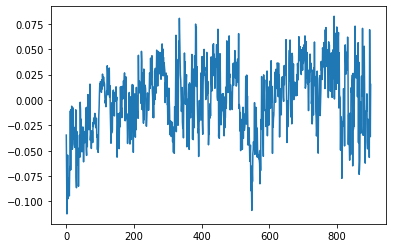

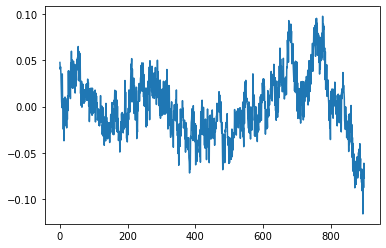

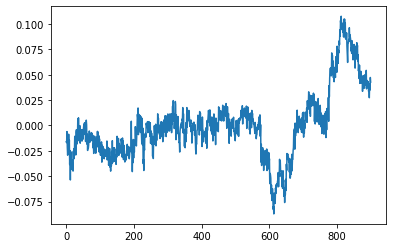

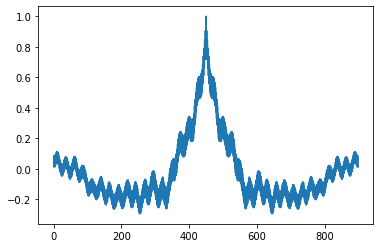

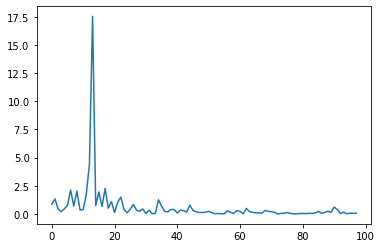

17.55094115476229 2.2635218817696554
estimated heartrate  70.0


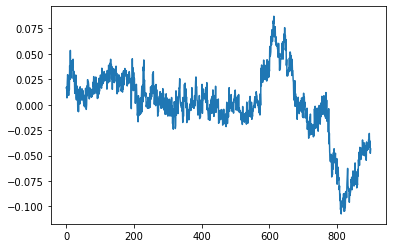

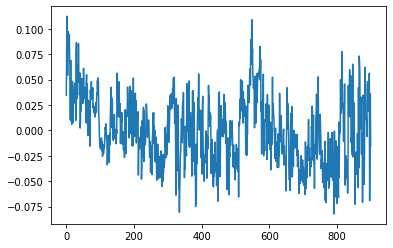

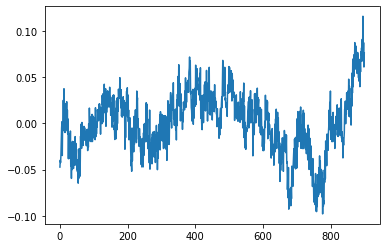

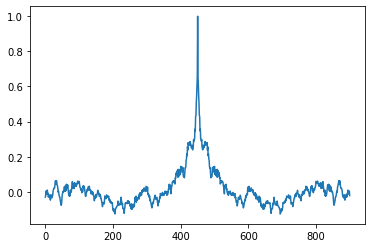

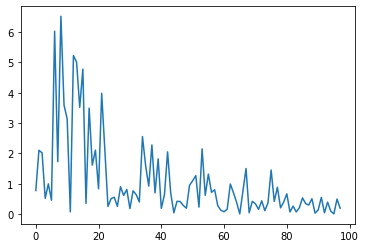

6.516825282023908 5.224284448860605
waiting


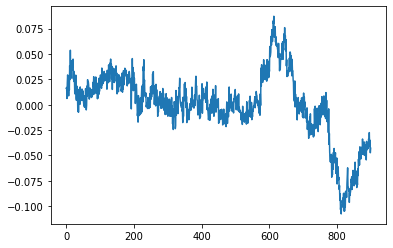

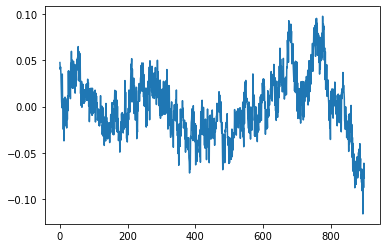

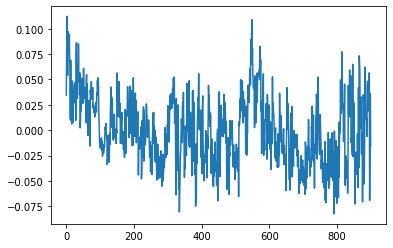

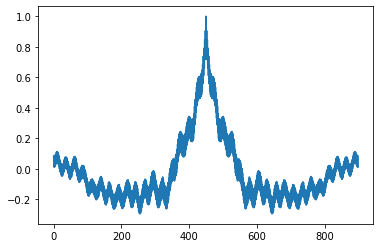

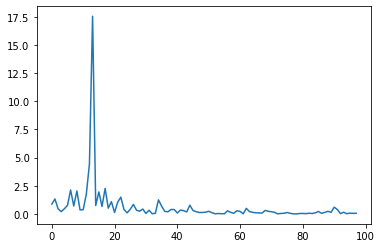

17.556708217264678 2.2631812205384394
estimated heartrate  70.0


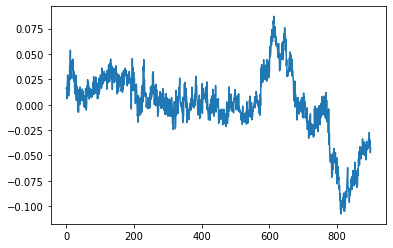

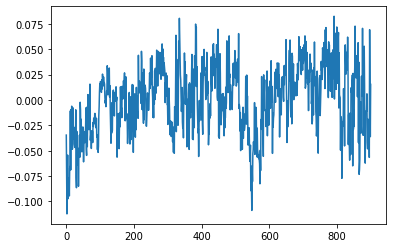

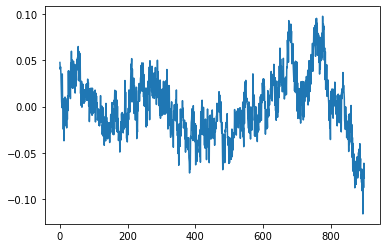

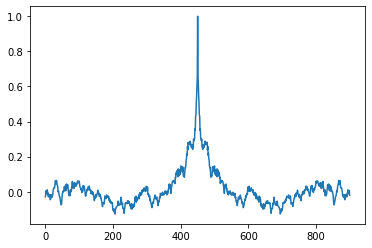

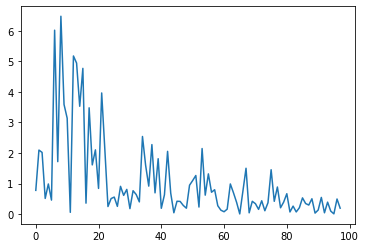

6.471865362143566 5.173054848547023
waiting


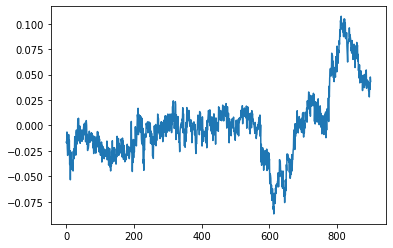

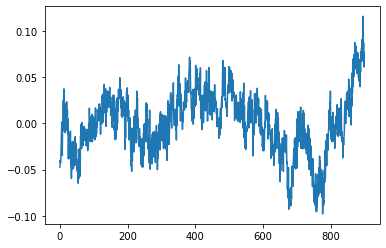

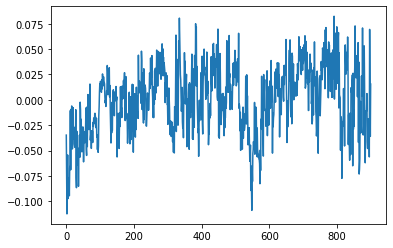

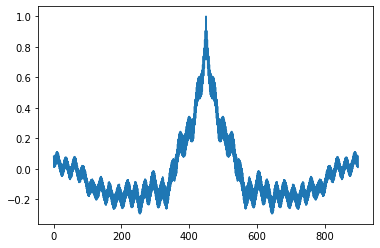

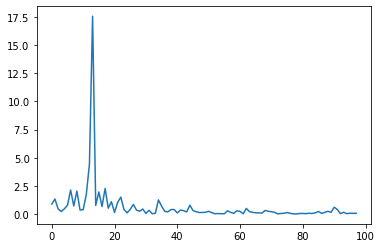

17.569631877681957 2.2594772984823916
estimated heartrate  70.0


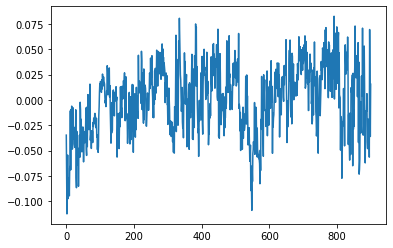

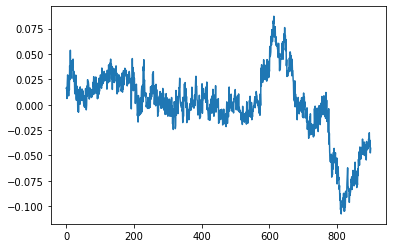

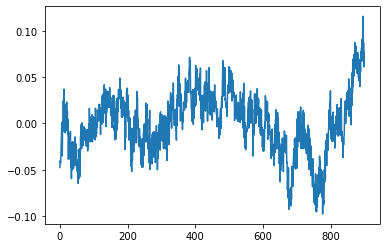

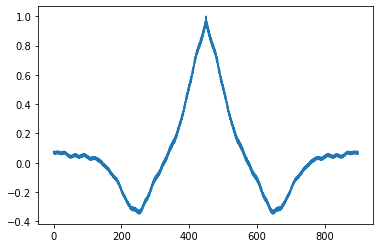

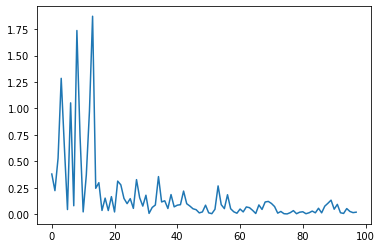

1.8712193394455259 1.7363462817119408
waiting


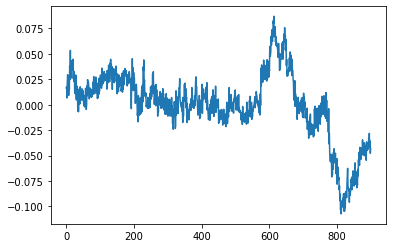

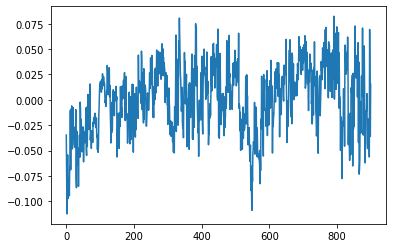

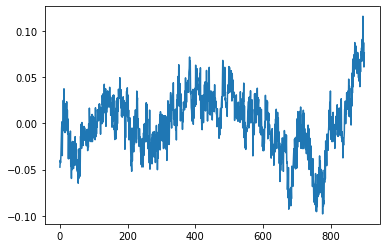

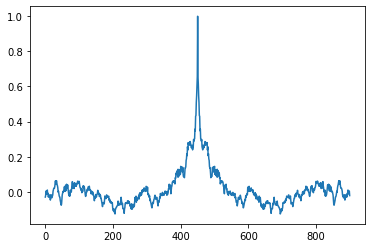

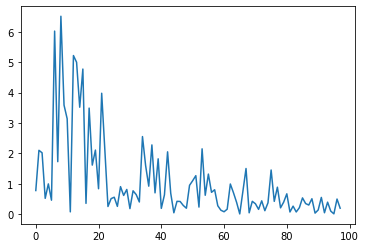

6.5126739930252375 5.219568892189583
waiting


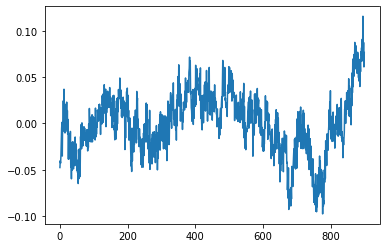

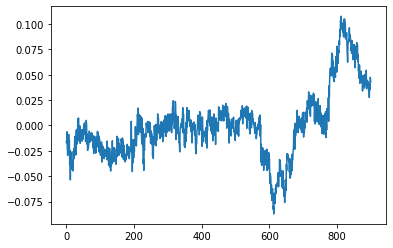

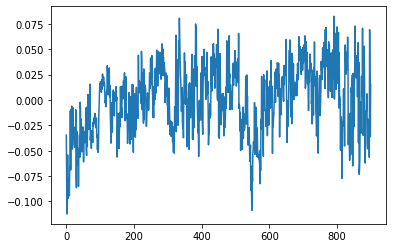

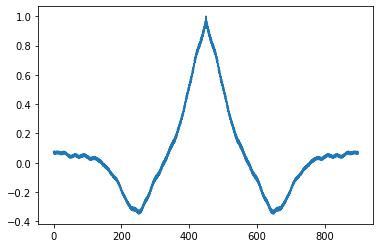

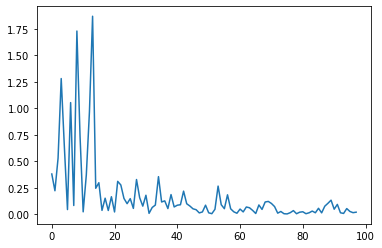

1.8707453857376326 1.73100810278457
waiting


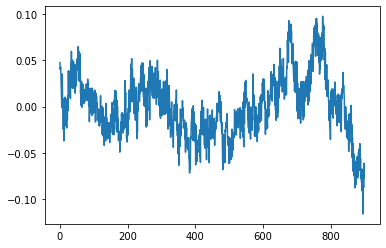

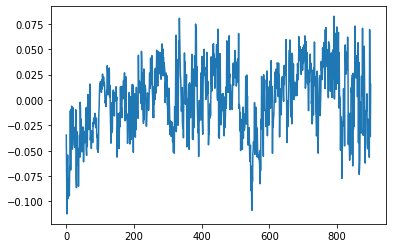

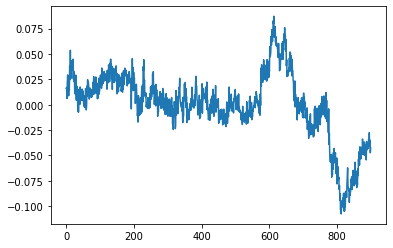

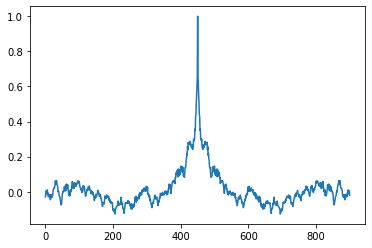

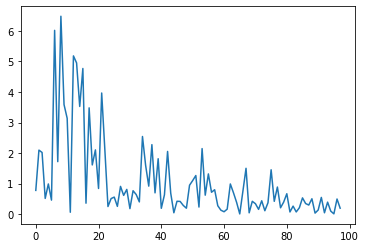

6.4790916818358175 5.181334286924539
waiting


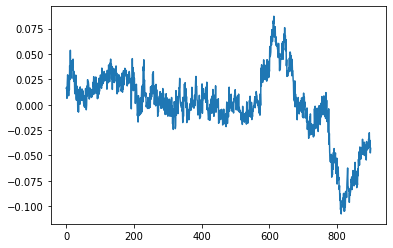

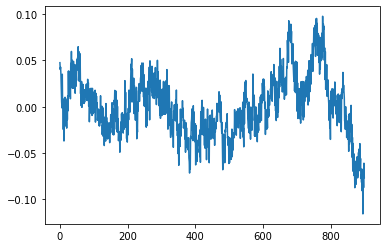

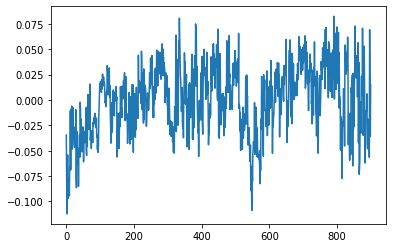

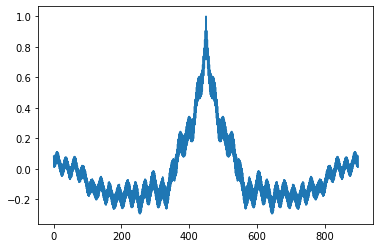

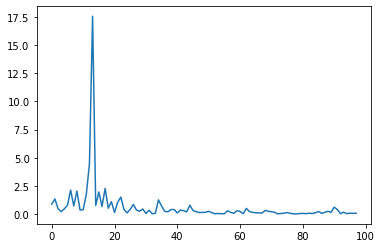

17.56697099209636 2.2632116584027977
estimated heartrate  70.0


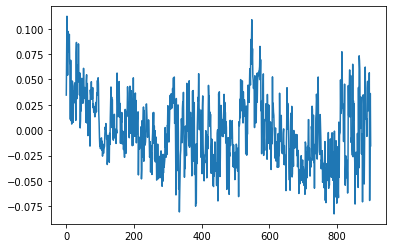

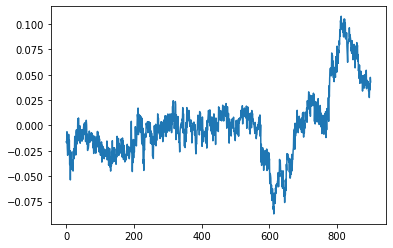

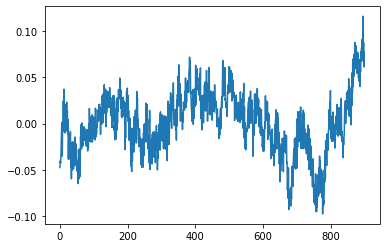

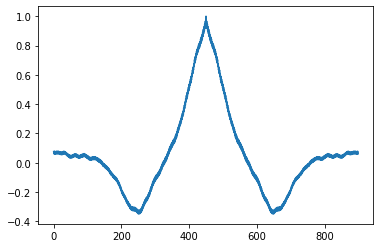

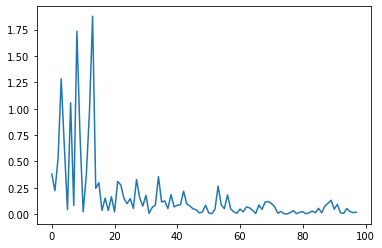

1.8760589293460155 1.733349812014545
waiting


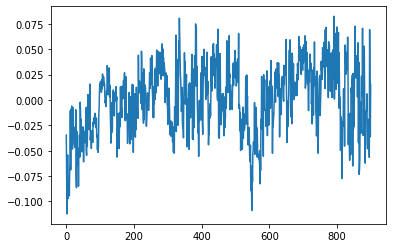

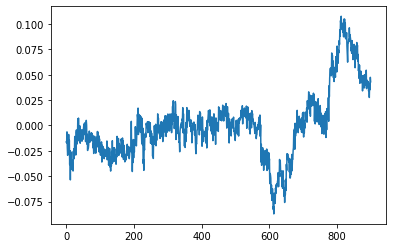

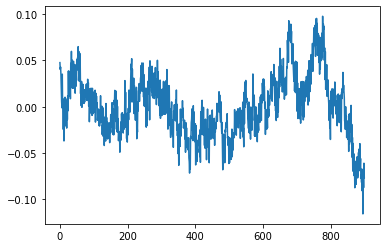

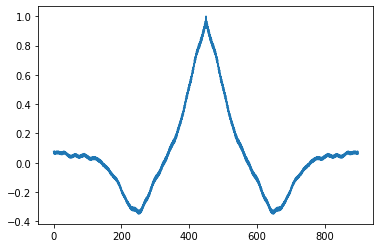

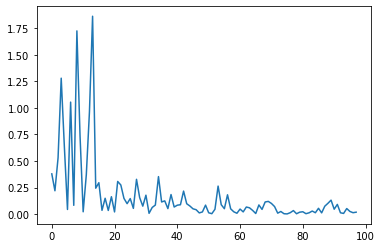

1.8624209630142488 1.7245742739220766
waiting


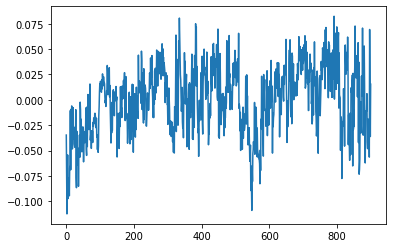

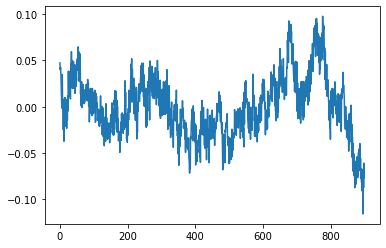

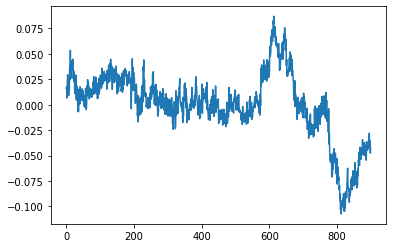

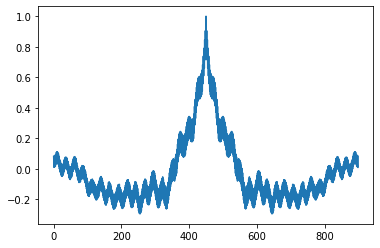

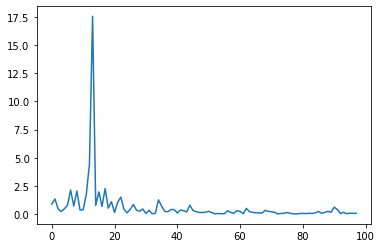

17.580793157491577 2.262357902349178
estimated heartrate  70.0


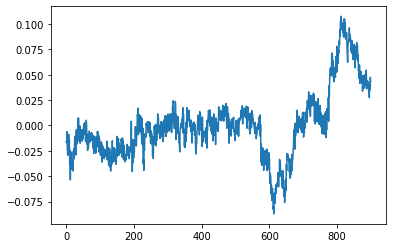

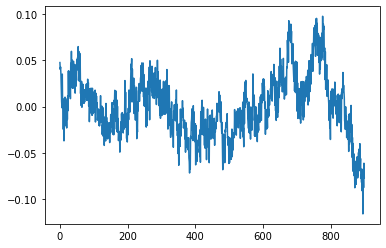

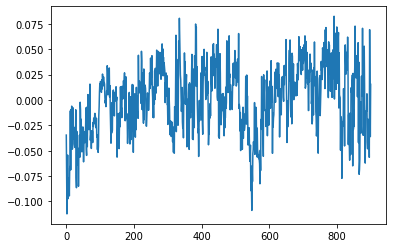

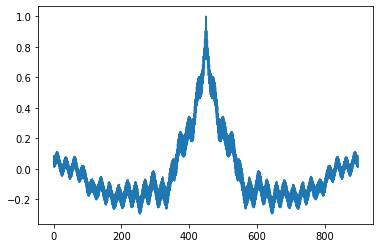

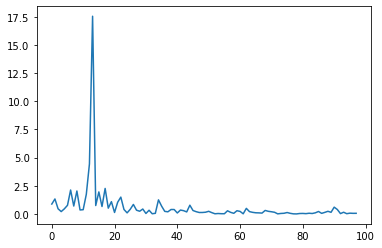

17.556497010817626 2.26310628469116
estimated heartrate  70.0


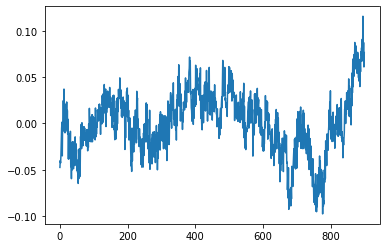

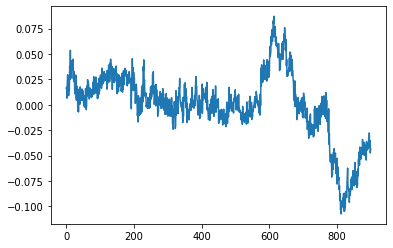

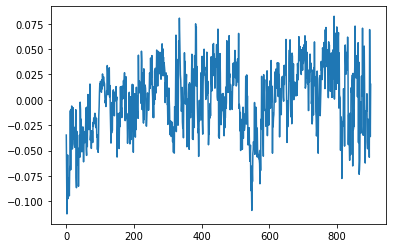

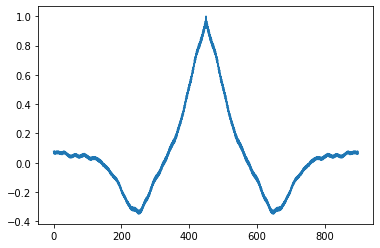

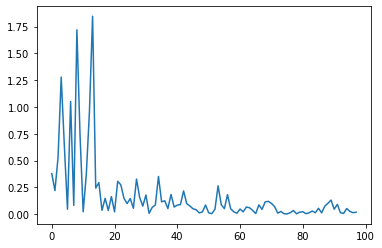

1.8456394042916706 1.7190467932470606
waiting


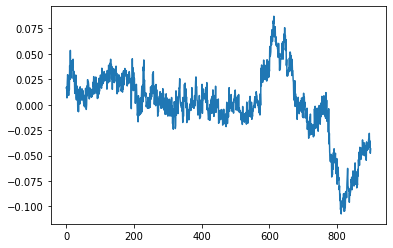

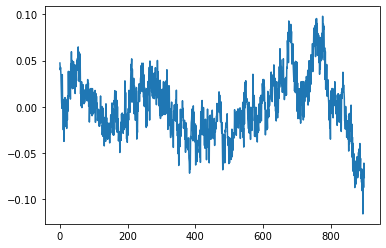

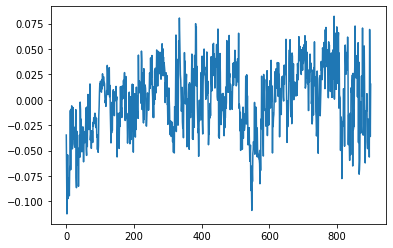

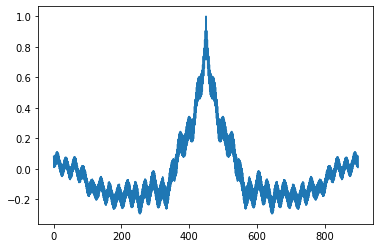

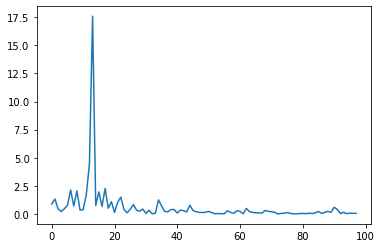

17.590562325337938 2.26252843655772
estimated heartrate  70.0


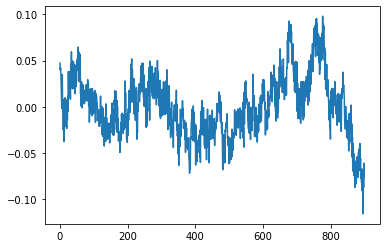

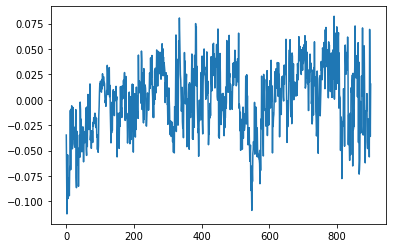

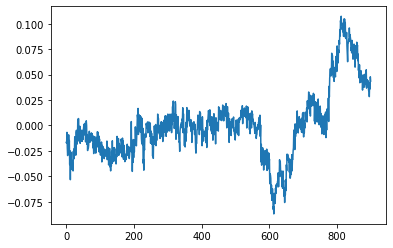

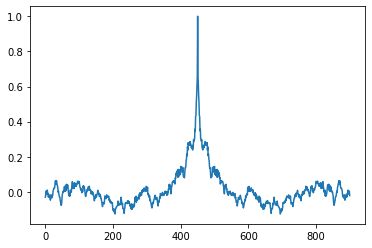

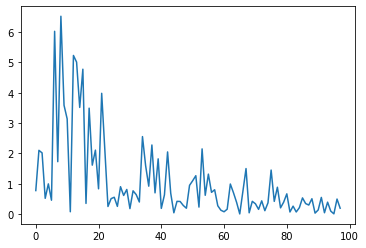

6.52165065928294 5.229728428444661
waiting


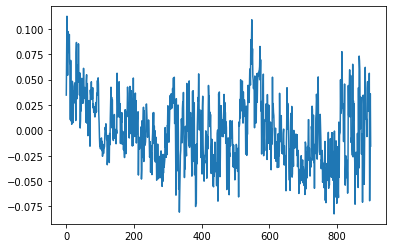

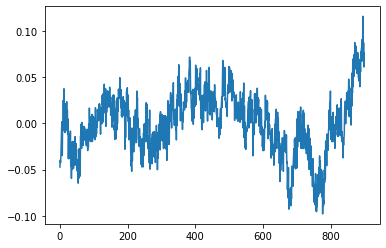

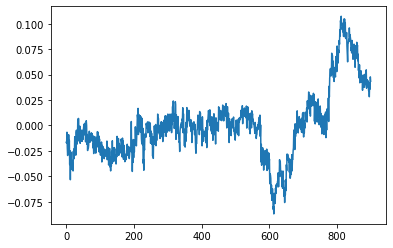

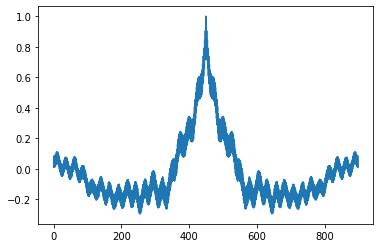

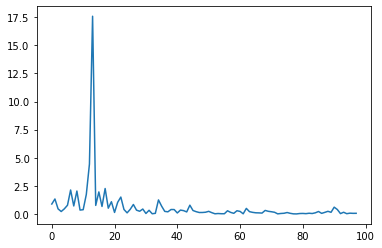

17.585027963273166 2.260760496784347
estimated heartrate  70.0


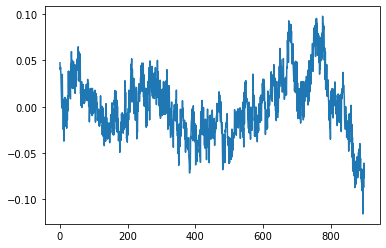

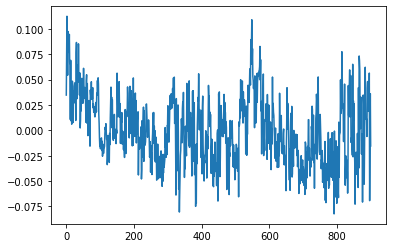

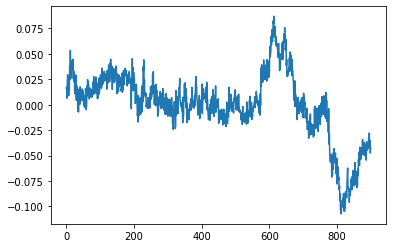

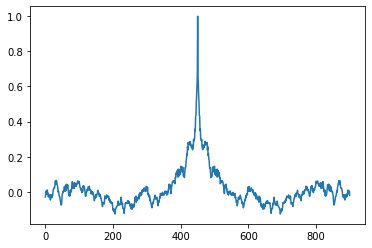

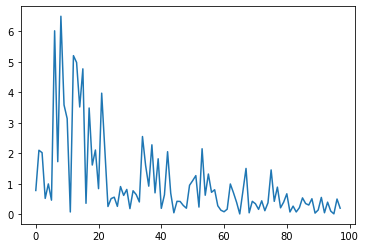

6.500462279807298 5.206415698298323
waiting


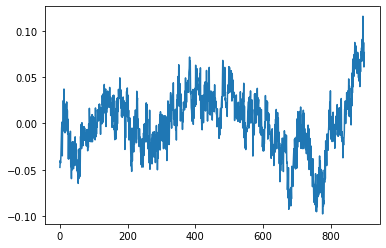

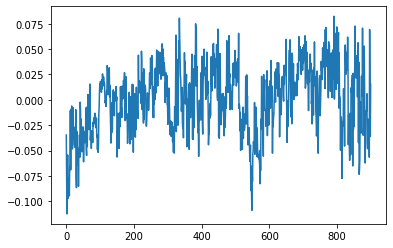

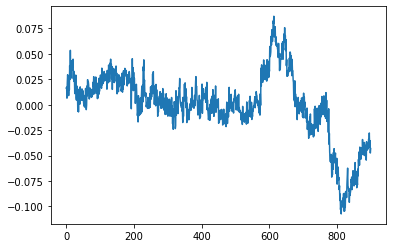

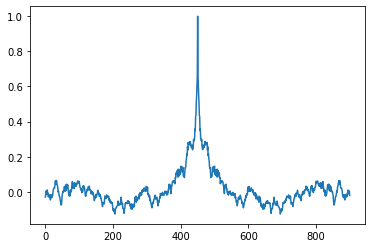

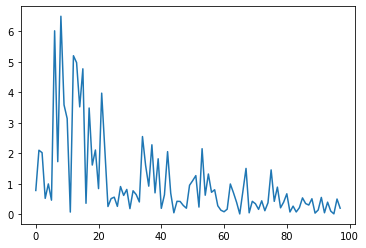

6.4977061397651825 5.201618209952519
waiting


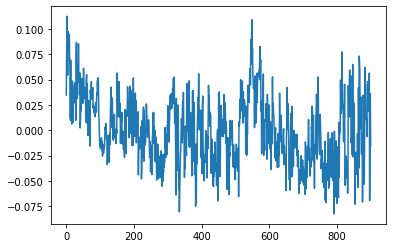

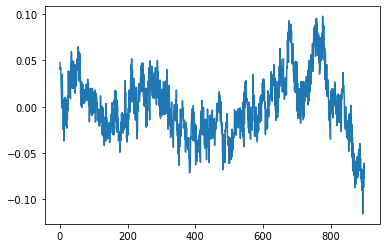

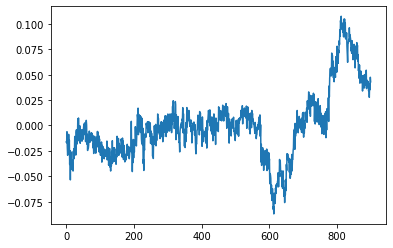

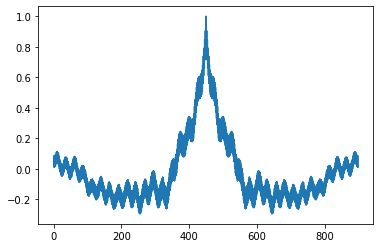

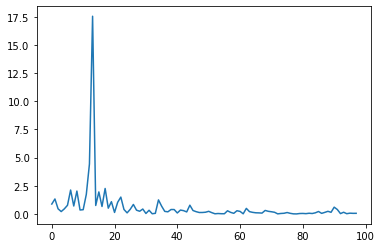

17.554066813568557 2.2602466283903384
estimated heartrate  70.0


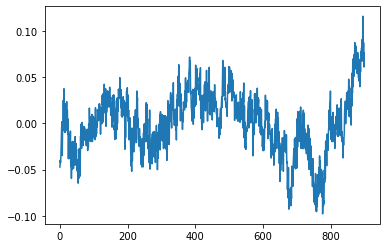

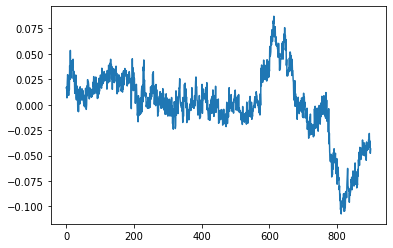

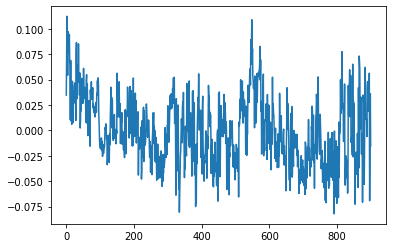

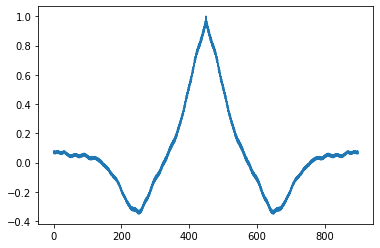

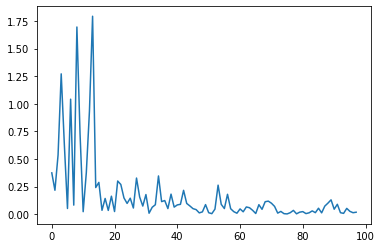

1.7936055075689668 1.6960964867011814
waiting


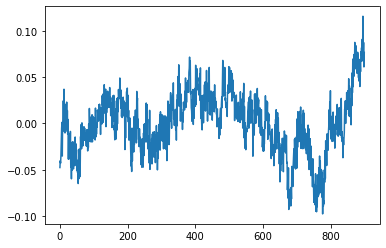

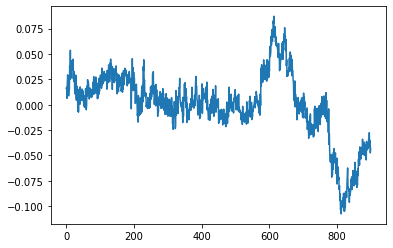

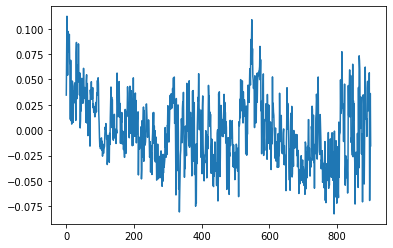

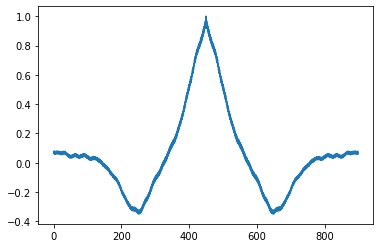

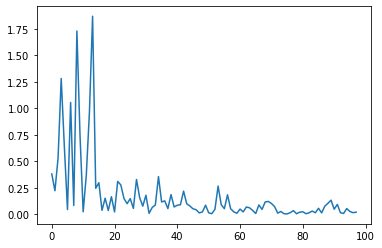

1.8688031678336334 1.7294288903032204
waiting


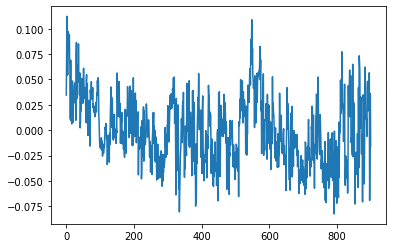

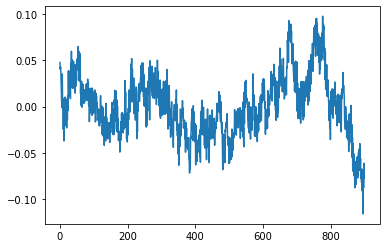

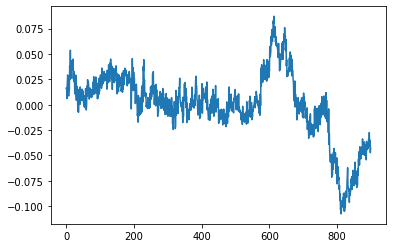

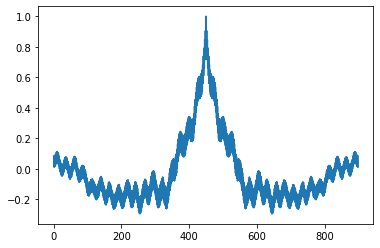

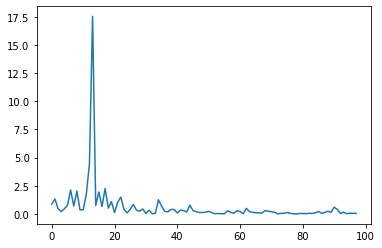

17.55339816184048 2.263374765966389
estimated heartrate  70.0


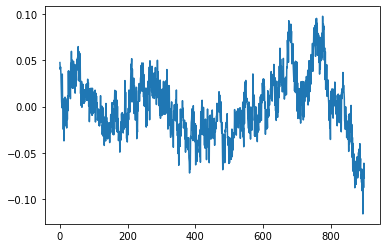

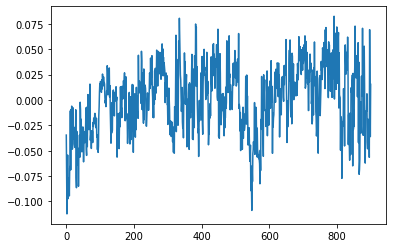

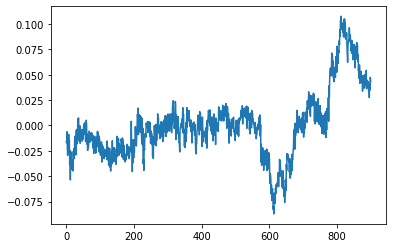

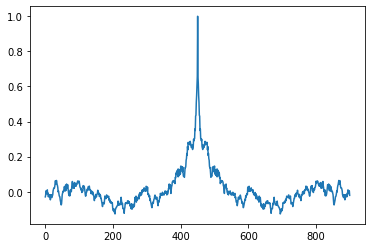

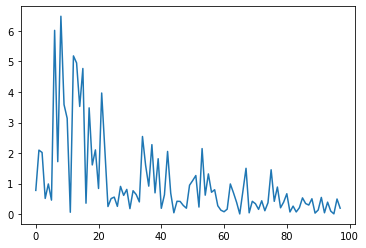

6.47915839312352 5.181354713350125
waiting


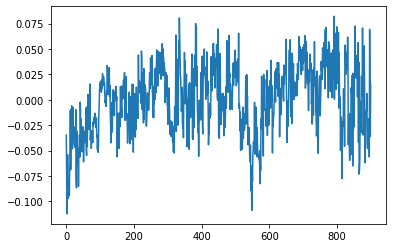

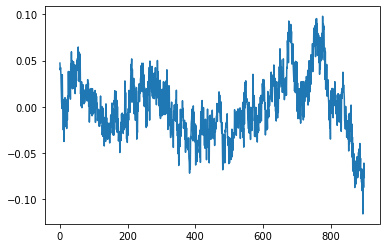

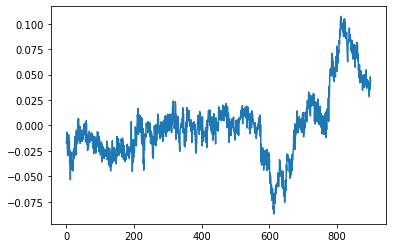

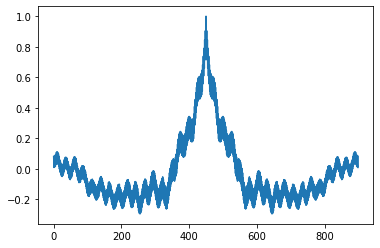

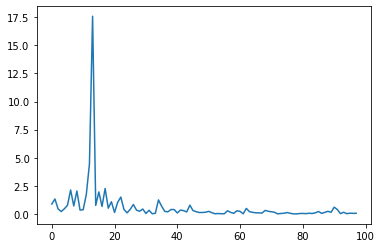

17.591795978727365 2.261536131075585
estimated heartrate  70.0


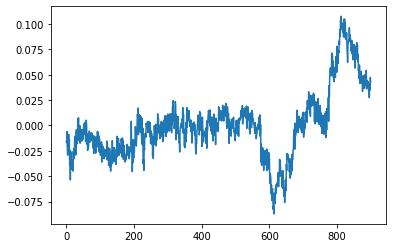

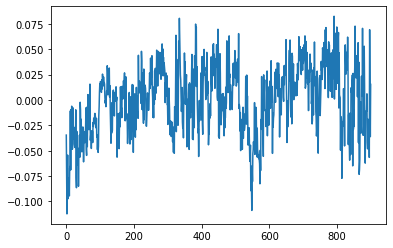

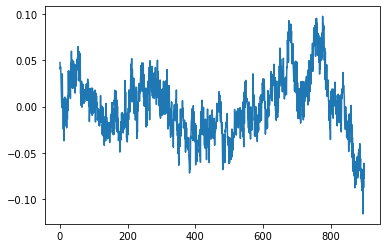

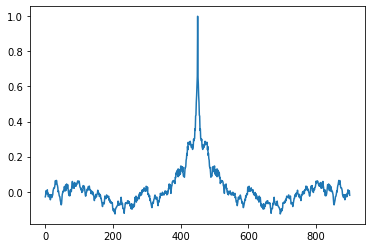

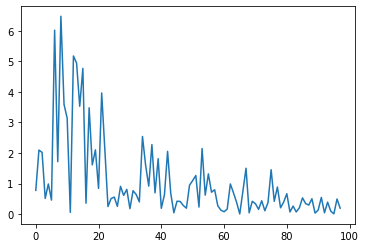

6.47158392197845 5.172735495199887
waiting


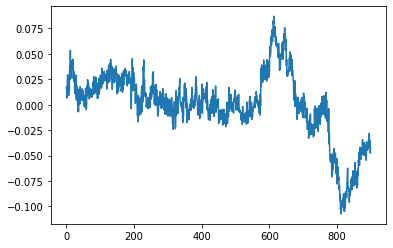

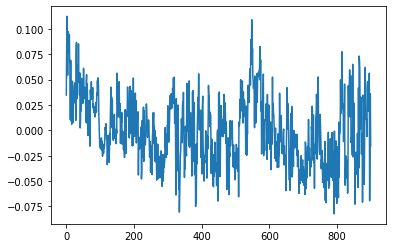

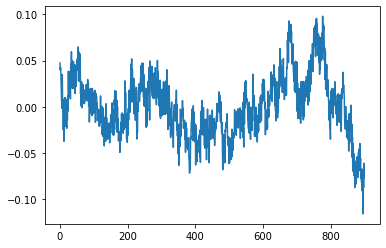

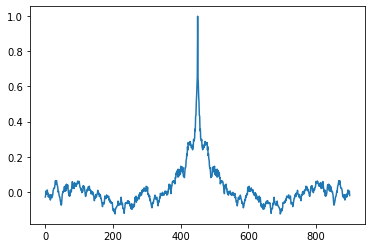

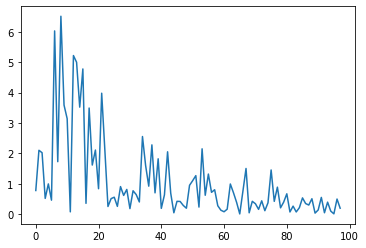

6.507358961287777 5.215182544518224
waiting


In [230]:
#normalize over 30s windows as in Poe et al.
n30 = int((n_frames - 900)/30) #number of 30 second sliding windows
ran = np.zeros(900)
gan = np.zeros(900)
ban = np.zeros(900)
for i in range(n30):
  rav = np.mean(ra[i*30:i*30+900])
  gav = np.mean(ga[i*30:i*30+900])
  bav = np.mean(ba[i*30:i*30+900])
  rstd = np.std(ra[i*30:i*30+900])
  gstd = np.std(ga[i*30:i*30+900])
  bstd = np.std(ba[i*30:i*30+900])
  for j in range(900):
    ran[j] = (ra[j] - rav)/rstd
    gan[j] = (ga[j] - gav)/gstd
    ban[j] = (ba[j] - bav)/bstd
  X = np.array(list(zip(ran,gan,ban)))
  X_transformed = transformer.fit_transform(X)
  X_indep = X_transformed.transpose()
  plt.plot(X_indep[0])
  plt.show()
  plt.plot(X_indep[1])
  plt.show()
  plt.plot(X_indep[2])
  plt.show()
  x1 = X_indep[1]
  x1_corr = signal.correlate(x1, x1, mode='same')
  plt.plot(x1_corr)
  plt.show()
  ff = np.fft.hfft(x1_corr[:int(len(x1_corr)/2)])
  fs_n = 30/len(x1_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.5*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate ", hr1)
  else:
    print("waiting")



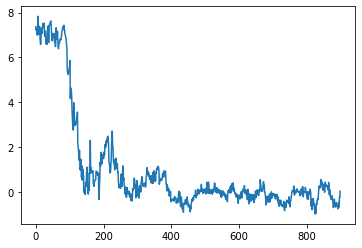

In [217]:
plt.plot(ran)

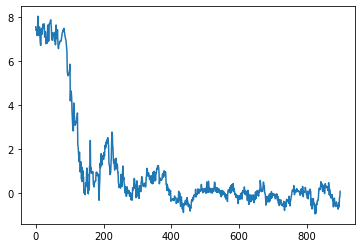

In [218]:
plt.plot(gan)

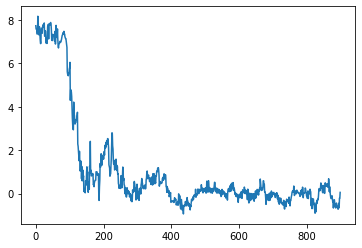

In [219]:
plt.plot(ban)